In [1]:
# Object manipulation
import statistics
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
rs = 3


print("✅ Libaries import successfully")

✅ Libaries import successfully


In [2]:
df = pd.read_csv(r"C:\Users\Akshat Sharma\OneDrive\Desktop\Data Science\Machine learning\Decision Tree\Imarticus Dataset\Decision Tree Project\Dataset 2\Random Forest Project\Dataset\TaxiFare.csv", parse_dates= ["date_time_of_pickup"])

In [3]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2


## Cleaning longitude and latitude column

In [4]:
mask = df[(df["longitude_of_pickup"] == 0) | (df["latitude_of_pickup"] == 0) | (df["longitude_of_dropoff"] == 0) | (df["latitude_of_dropoff"] == 0)]
mask.index

Index([   11,    15,    26,   124,   192,   233,   273,   357,   376,   387,
       ...
       49401, 49510, 49520, 49565, 49580, 49625, 49816, 49845, 49856, 49967],
      dtype='int64', length=1000)

In [5]:
df.drop(index = mask.index, inplace = True)

In [6]:
df.shape

(49000, 8)

In [7]:
mask_1 = df[df["amount"] <= 0]
mask_1

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2039,37:10.0,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1
2486,14:27.0,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1
10002,26:01.0,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1
13032,57:10.0,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4
27891,40:28.0,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1
36722,19:45.0,-2.5,2015-04-30 15:19:45+00:00,-73.952187,40.790112,-73.950043,40.792839,1
42337,29:46.0,-5.0,2015-03-09 10:29:46+00:00,-73.990974,40.755985,-73.980820,40.759869,1
47302,13:39.0,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1


In [8]:
df.drop(index = mask_1.index, inplace = True)

<Axes: xlabel='amount', ylabel='Density'>

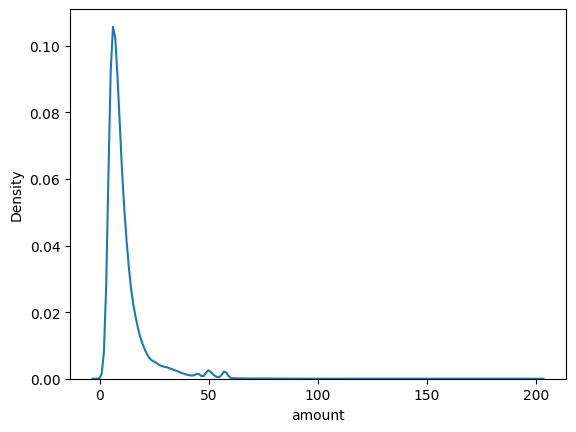

In [9]:
sns.kdeplot(data = df, x= "amount")

<Axes: >

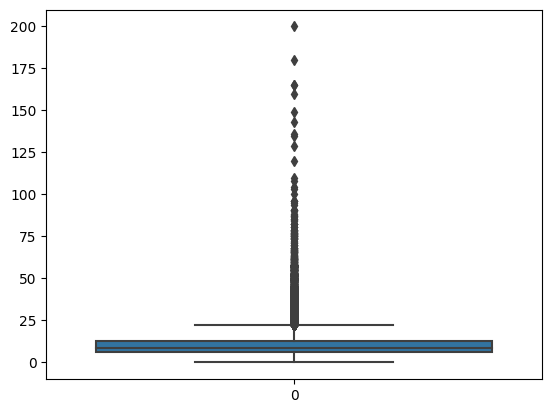

In [10]:
sns.boxplot(data = df["amount"])

## Clean date time column

In [11]:
df["year"] = df["date_time_of_pickup"].dt.year
df["month"] = df["date_time_of_pickup"].dt.month
df["time"] = df["date_time_of_pickup"].dt.time
df["date"] = df["date_time_of_pickup"].dt.date

In [12]:
df["hour"] = df["date_time_of_pickup"].dt.hour

In [13]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,time,date,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17:26:21,2009-06-15,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16:52:16,2010-01-05,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,00:35:00,2011-08-18,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,04:30:42,2012-04-21,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,07:51:00,2010-03-09,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,23:25:15,2013-06-12,23
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,17:19:18,2015-06-22,17
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,04:53:00,2011-01-30,4
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,07:09:00,2012-11-06,7


In [14]:
df["year"].value_counts()

year
2012    7817
2013    7685
2011    7642
2009    7612
2010    7461
2014    7390
2015    3385
Name: count, dtype: int64

In [15]:
def weekend_or_weekday(date_str):
    # No need to convert to datetime, assuming 'date_str' is in 'YYYY-MM-DD' format
    
    # Get the day of the week (0 for Monday, 1 for Tuesday, ..., 6 for Sunday)
    day_of_week = date_str.weekday()
    
    # Check if the day is a weekend (Saturday or Sunday) or a weekday (Monday to Friday)
    if day_of_week > 5:  # Saturday (5) or Sunday (6) are weekend days
        return "Weekend"
    else:
        return "Weekday"

In [16]:
df['day_type'] = df['date'].apply(weekend_or_weekday)

In [17]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,time,date,hour,day_type
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17:26:21,2009-06-15,17,Weekday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16:52:16,2010-01-05,16,Weekday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,00:35:00,2011-08-18,0,Weekday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,04:30:42,2012-04-21,4,Weekday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,07:51:00,2010-03-09,7,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,23:25:15,2013-06-12,23,Weekday
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,17:19:18,2015-06-22,17,Weekday
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,04:53:00,2011-01-30,4,Weekend
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,07:09:00,2012-11-06,7,Weekday


In [18]:
df['day_segment'] =np.where(((df['hour']>= 5) & (df['hour']< 12)), 'morning',
                     np.where(((df['hour']>= 12) & (df['hour']< 18)), 'afternoon',
                        np.where(((df['hour']>= 18) & (df['hour']< 21)), 'evening', 'night')))

In [19]:
np.where((df["hour"] >= (5:00:00)) & (df["hour"] <= (11:59:59)), "Morning",
         np.where(df["hour"] >= (12:00:00)) & (df["hour"] <= (17:59:59)), "Afternoon",
         (df["hour"] >= (18:00:00)) & (df["time"] <= (20:59:59)), "Evening",
         (df["hour"] >= (21:00:00)) & (df["time"] <= (23:59:59)), "Night",)

In [20]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,time,date,hour,day_type,day_segment
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17:26:21,2009-06-15,17,Weekday,afternoon
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16:52:16,2010-01-05,16,Weekday,afternoon
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,00:35:00,2011-08-18,0,Weekday,night
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,04:30:42,2012-04-21,4,Weekday,night
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,07:51:00,2010-03-09,7,Weekday,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,23:25:15,2013-06-12,23,Weekday,night
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,17:19:18,2015-06-22,17,Weekday,afternoon
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,04:53:00,2011-01-30,4,Weekend,night
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,07:09:00,2012-11-06,7,Weekday,morning


## Split into Train Test Split

In [21]:
X = df.drop(columns = ["unique_id", "date", "date_time_of_pickup","amount", "time", "hour"])
y = df["amount"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 3, test_size=0.2)

In [23]:
X_train.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day_type,day_segment
28463,-73.961647,40.764542,-73.971428,40.751190,1,2015,5,Weekday,morning
32907,-73.971240,40.758887,-73.973072,40.764422,6,2014,10,Weekday,morning
31233,-74.009597,40.713437,-74.002327,40.715465,1,2013,2,Weekday,morning
1806,-73.995110,40.723190,-73.984833,40.736307,2,2014,2,Weekday,night
23506,-73.980073,40.784009,-73.896791,40.906383,1,2010,5,Weekday,night


In [24]:
ord = OrdinalEncoder(categories= [["Weekday", "Weekend"], ["morning", "afternoon", "evening", "night"]],
                     handle_unknown= "use_encoded_value", unknown_value= -1)

X_train[["day_type", "day_segment"]] = pd.DataFrame(ord.fit_transform(X_train[["day_type", "day_segment"]]), index= X_train.index)
X_test[["day_type", "day_segment"]] = pd.DataFrame(ord.transform(X_test[["day_type", "day_segment"]]), index= X_test.index)



In [25]:
X_train

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day_type,day_segment
28463,-73.961647,40.764542,-73.971428,40.751190,1,2015,5,0.0,0.0
32907,-73.971240,40.758887,-73.973072,40.764422,6,2014,10,0.0,0.0
31233,-74.009597,40.713437,-74.002327,40.715465,1,2013,2,0.0,0.0
1806,-73.995110,40.723190,-73.984833,40.736307,2,2014,2,0.0,3.0
23506,-73.980073,40.784009,-73.896791,40.906383,1,2010,5,0.0,3.0
...,...,...,...,...,...,...,...,...,...
26066,-73.987750,40.755995,-73.991255,40.750540,1,2014,3,0.0,1.0
49051,-73.992964,40.742936,-74.005197,40.748205,1,2013,9,0.0,0.0
11746,-73.967027,40.804004,-73.975094,40.792814,2,2009,5,1.0,3.0
1724,-73.933208,40.758397,-73.969643,40.763295,1,2013,1,0.0,3.0


## Base Model

In [26]:
rfr = RandomForestRegressor(n_estimators=1000, oob_score= True, n_jobs=-1, criterion="squared_error", random_state=rs)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=3)

In [27]:
rfr.score(X_test, y_test)

0.7988520473768508

In [28]:
rfr.oob_score_

0.781130782109945

In [29]:
rfr.n_features_in_

9

## Model 2 

In [30]:
rfr = RandomForestRegressor(n_estimators=1000, oob_score= True, n_jobs=-1, criterion="squared_error", random_state=rs, max_depth = 25)
rfr.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
rfr.score(X_train, y_train)

0.9364035908482505

In [ ]:
rfr.oob_score_

0.7751157158946324

In [ ]:
rfr.score(X_test, y_test)

0.7913863042788455

In [ ]:
hbgkhbgkh

## Model 3 

In [ ]:
# model = RandomForestRegressor()  # Use RandomForestRegressor for regression tasks

# # Define the parameter grid
param_dict = {
    "n_estimators": [x for x in range(100,500,100)],  # You can add more values
    "criterion": ["squared_error", "absolute_error","poisson"],
    "max_depth": [x for x in range(1,10,1)],
    "min_samples_split": [x for x in range(10,25,2)],
    "min_samples_leaf": [x for x in range(4,14,2)],
    "max_features": ["sqrt", "log2"]
# }

# # Create KFold cross-validation
# # kf = KFold(n_splits=5, shuffle=True)

# # Perform grid search
# rs = RandomizedSearchCV(
#     estimator=model, param_distributions=param_dict,random_state=rs,
#     verbose=4,n_jobs = -1, cv = 3, n_iter=10
# )

# rs.fit(X_train, y_train)

# # Print the best parameters found
# print("Best parameters:", rs.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 400, 'min_samples_split': 18, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'squared_error'}


In [ ]:
# Print the best parameters found
rs.best_estimator_

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=12,
                      min_samples_split=18, n_estimators=400)

In [ ]:
y_pred_1 = rs.predict(X_test)
rs.score(X_test, y_test)

In [ ]:
rfr_1 = RandomForestRegressor(oob_score=True,
    n_estimators=200,
    min_samples_split=35,
    min_samples_leaf=8,
    max_features=None,
    max_depth=22)
rfr_1.fit(X_train,y_train)
y_pred = rfr_1.predict(X_test)
print("accuracy -->", rfr_1.score(X_test, y_test))


accuracy --> 0.7999877074209176


In [ ]:
mse = mean_squared_error(y_test, y_pred_1, squared=False)
mse

24.348134085978884

In [ ]:
model = RandomForestRegressor()  # Use RandomForestRegressor for regression tasks

# Define the parameter grid
param_dict = {
    "n_estimators": [x for x in range(100,500,100)],  # You can add more values
    "criterion": ["squared_error", "absolute_error","poisson"],
    "max_depth": [x for x in range(1,10,1)],
    "min_samples_split": [x for x in range(10,25,2)],
    "min_samples_leaf": [x for x in range(4,14,2)],
    "max_features": ["sqrt", "log2"]
}

# Create KFold cross-validation
# kf = KFold(n_splits=5, shuffle=True)

# Perform grid search
gs = GridSearchCV(
    estimator=model, param_grid=param_dict,
    verbose=3,n_jobs = -1
)

gs.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", gs.best_params_)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


KeyboardInterrupt: 